## Questions :

- **What is anomaly detection?**
- **What are the applications?**
- **What are the characteristics?**
- **What are the algorithms to detect anomalies?**
- **What is differentiating from other algorithms?**
- What is Fraud in Financial Data?
- Benchmarking?
- Expiremantal result?

### Anomaly detection

In data analysis, anomaly detection (also outlier detection) is the identification of rare items, events or observations which raise suspicions by differing significantly from the majority of the data.

*Wikipedia - Anomaly detection*


### Applications
Anomaly detection is applicable in a variety of domains, such as intrusion detection, fraud detection, fault detection, system health monitoring, event detection in sensor networks, and detecting ecosystem disturbances. It is often used in preprocessing to remove anomalous data from the dataset.

... Anomaly detection was proposed for intrusion detection systems (IDS) by Dorothy Denning in 1986.

*Wikipedia - Anomaly detection

### Three settings

* Supervised
    * Training data labeled with nominal or anomaly
* Unsupervised
    * Training data consist of nominal and anomaly
* Semi-supervised
    * Training data are all nominal, test data may be contaminated by with anomaly
    
Of course, the labeling data requires a tendemous effort. So unsupervised detection is more common in industry. Also, Anomalies only occurs very rarely in dataset. But I will start most simple algorithms and datasets to understand basics.

Now lets start with the most basic univariate anomaly detection using conventional algorithms. Our benchmarking is worked with Sales and Profits of Super Store Sale dataset.  

## Univariate anomaly detection

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import minmax_scale
# Import all models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP
import matplotlib.font_manager

%matplotlib inline
pd.set_option('display.float_format', '{:.2f}'.format)

### Exploratory on the data


In [61]:
df = pd.read_excel("Superstore.xls")

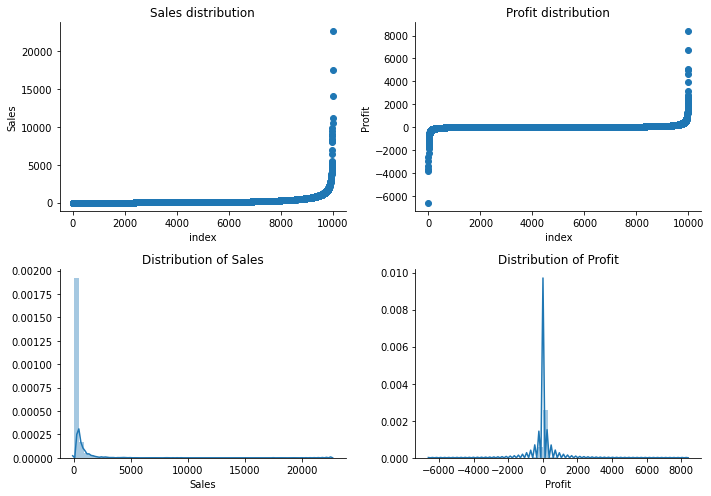

In [62]:
plt.figure(figsize=(10, 7))

subplot = plt.subplot(2,2,1)

subplot.scatter(range(df.shape[0]), np.sort(df['Sales'].values))
subplot.set_ylabel('Sales')
subplot.set_xlabel('index')
plt.title("Sales distribution")

subplot = plt.subplot(2,2,2)
subplot.scatter(range(df.shape[0]), np.sort(df['Profit'].values))
subplot.set_ylabel('Profit')
subplot.set_xlabel("index")
plt.title("Profit distribution")

subplot = plt.subplot(2,2,3)
sns.distplot(df['Sales'])
plt.title("Distribution of Sales")

subplot = plt.subplot(2,2,4)
sns.distplot(df['Profit'])
plt.title("Distribution of Profit")

plt.tight_layout()
sns.despine()

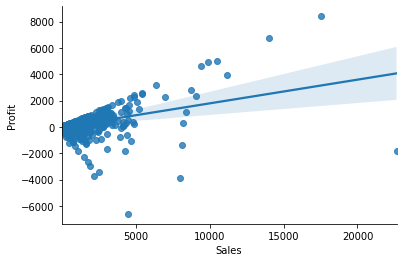

In [63]:
sns.regplot(x="Sales", y="Profit", data=df)
sns.despine();

### Anomaly detection approaches

- Density-Based Approaches
    - Local Outlier Factor (LOF) ...
- Quantile-Based Methods
    - One-class SVM (OCSVM) ...
- Neighbor-Based Methods
    - k Nearest Neighbours(KNN) ...
- Projection-Based Methods
    - Isolation Forest(IFOR) ...


I will try out anomaly detection algorithms in PyOD library.

In [66]:
# initialize a set of detectors for LSCP
detector_list = [LOF(n_neighbors=5), LOF(n_neighbors=10), LOF(n_neighbors=15),
                 LOF(n_neighbors=20), LOF(n_neighbors=25), LOF(n_neighbors=30),
                 LOF(n_neighbors=35), LOF(n_neighbors=40), LOF(n_neighbors=45),
                 LOF(n_neighbors=50)]

clusters_separation = [0]

outliers_fraction = 0.01

random_state = np.random.RandomState(42)
# Define nine outlier detection tools to be compared
classifiers = {
#     'Angle-based Outlier Detector (ABOD)':
#         ABOD(contamination=outliers_fraction),
    'Cluster-based Local Outlier Factor (CBLOF)':
        CBLOF(contamination=outliers_fraction,
              check_estimator=False, random_state=random_state),
    'Histogram-base Outlier Detection (HBOS)': HBOS(
        contamination=outliers_fraction),
    'Isolation Forest': IForest(contamination=outliers_fraction,
                                random_state=random_state),
    'K Nearest Neighbors (KNN)': KNN(
        contamination=outliers_fraction),
    'Average KNN': KNN(method='mean',
                       contamination=outliers_fraction),
    'Local Outlier Factor (LOF)':
        LOF(n_neighbors=35, contamination=outliers_fraction),
    'Minimum Covariance Determinant (MCD)': MCD(
        contamination=outliers_fraction, random_state=random_state),
    'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
    'Principal Component Analysis (PCA)': PCA(
        contamination=outliers_fraction, random_state=random_state),
}

In [19]:
# Show all detectors
for i, clf in enumerate(classifiers.keys()):
    print('Model', i + 1, clf)

Model 1 Cluster-based Local Outlier Factor (CBLOF)
Model 2 Histogram-base Outlier Detection (HBOS)
Model 3 Isolation Forest
Model 4 K Nearest Neighbors (KNN)
Model 5 Average KNN
Model 6 Local Outlier Factor (LOF)
Model 7 Minimum Covariance Determinant (MCD)
Model 8 One-class SVM (OCSVM)
Model 9 Principal Component Analysis (PCA)


1 fitting Cluster-based Local Outlier Factor (CBLOF)


/home/user/.local/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:968: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


OUTLIERS: 100 INLIERS: 9894
2 fitting Histogram-base Outlier Detection (HBOS)
OUTLIERS: 90 INLIERS: 9904
3 fitting Isolation Forest
OUTLIERS: 100 INLIERS: 9894
4 fitting K Nearest Neighbors (KNN)
OUTLIERS: 91 INLIERS: 9903
5 fitting Average KNN
OUTLIERS: 72 INLIERS: 9922
6 fitting Local Outlier Factor (LOF)
OUTLIERS: 96 INLIERS: 9898
7 fitting Minimum Covariance Determinant (MCD)
OUTLIERS: 100 INLIERS: 9894
8 fitting One-class SVM (OCSVM)
OUTLIERS: 100 INLIERS: 9894
9 fitting Principal Component Analysis (PCA)
OUTLIERS: 100 INLIERS: 9894


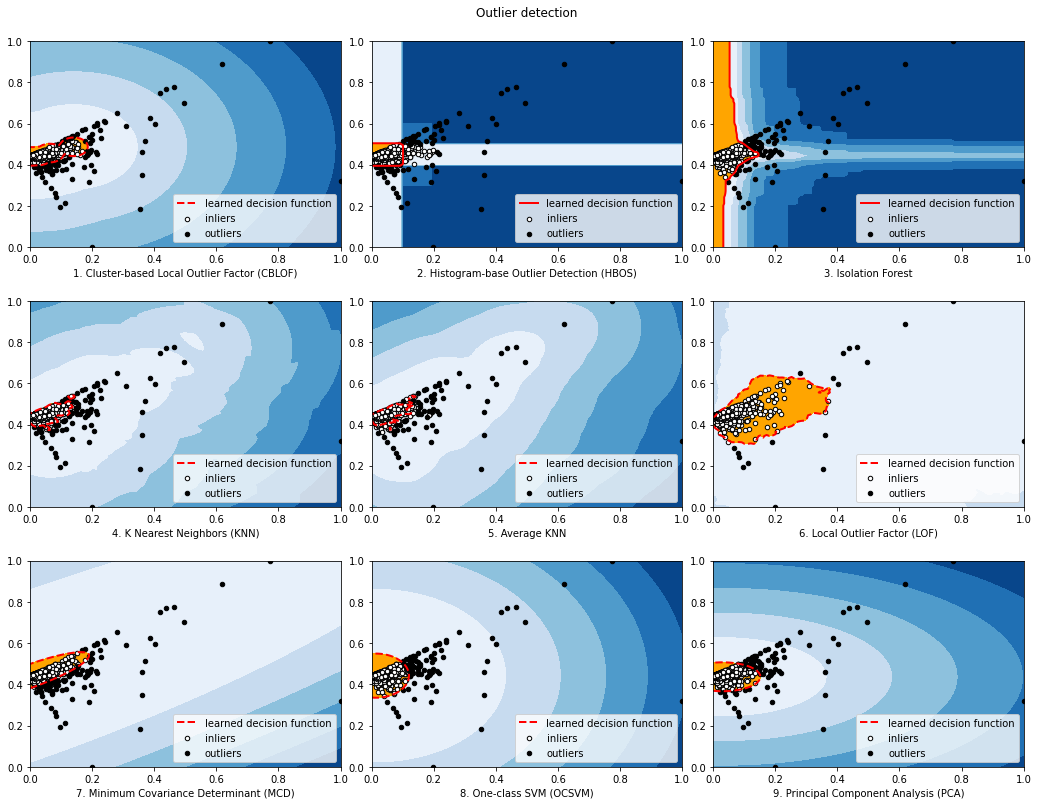

In [67]:
X= df[['Sales','Profit']].values

X = np.r_[minmax_scale(X, feature_range=(0,1))]


xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

plt.figure(figsize = (15,12))

df1 = df
df1['Sales'] = minmax_scale(df1['Sales'],feature_range=(0,1))
df1['Profit'] = minmax_scale(df1['Profit'],feature_range=(0,1))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    print(i + 1, 'fitting' , clf_name)
    np.seterr('ignore')
    clf.fit(X)
    scores_pred = clf.decision_function(X) * -1
    
#     scores_pred = np.nan_to_num(scores_pred)
    y_pred = clf.predict(X)
    
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)

    df1['outlier'] = y_pred.tolist()
    
    # sales - inlier feature 1,  profit - inlier feature 2
    inliers_sales = np.array(df1['Sales'][df1['outlier'] == 0]).reshape(-1,1)
    inliers_profit = np.array(df1['Profit'][df1['outlier'] == 0]).reshape(-1,1)

    # sales - outlier feature 1, profit - outlier feature 2
    outliers_sales = df1['Sales'][df1['outlier'] == 1].values.reshape(-1,1)
    outliers_profit = df1['Profit'][df1['outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS:',n_outliers,'INLIERS:',n_inliers)
    threshold = np.percentile(scores_pred, 100 * outliers_fraction)        
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
    
    subplot = plt.subplot(3,3,i+1)
    
    subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
    b = subplot.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
    c = subplot.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
    subplot.axis('tight')   
    subplot.legend([a.collections[0], b,c], 
                   ['learned decision function', 'inliers','outliers'],
                   loc='lower right')   
    subplot.set_xlabel("%d. %s" % (i + 1, clf_name))
    subplot.set_xlim((0, 1))
    subplot.set_ylim((0, 1))
plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
plt.suptitle('Outlier detection')
plt.show();

### How these algorithms works?
#### Angle-Based Outlier Detection
ABOF is the **variance over the angles** between the difference vectors of one point to all pairs of other points in set weighted by the distance of the points.

The spectrum of angles to pairs of points remains more small for an outlier while the variance of angles is higher for border points of cluster and very high for inner points of a cluster.

To speed up by approx. : only consider **K near points**

<figure > 
    <img align="center" caption="test" src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-030-31964-9_8/MediaObjects/488199_1_En_8_Fig3_HTML.png" width="400" title="Title"/>
</figure>

#### Histogram-Based Outlier Detection 

A histogram for each single feature can be computed, scored individually and combined at end for detect outliers.

Since it assumes indepence of the features, it can be computed much faster than multivariate approaches at the cost of less precisions.

<figure > 
    <img align="center" caption="test" src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRCy36lx4p4lNGPW6RSaID2abOotBcprieoHQ&usqp=CAU" width="400" title="Title"/>
</figure>


#### k Neares Neighbors
The proposed kNN method detects outliers by exploiting the relationship among neighborhoods in data points. The farther a data point is beyond its neighbors, the more possible the data is an outlier.

<figure > 
    <img align="center" caption="test" src="https://ars.els-cdn.com/content/image/1-s2.0-S0306437914001331-gr1.jpg" width="400" title="Title"/>
</figure>

#### Local Outlier Factor
Calculate how isolated the object is with respect to the surrounding neighborhood.

Unlinke proximity-based methods, LOF consider the density difference.

1. k-distance of an objecct p: distance to the kth most distant point
2. reachability distance of an object p is max of k-distance and object o
3. local reachability density of an object p is inverse of the average reachability distance of A from its neighbors.This tells how far a point is from the nearest cluster of points.
4. local outlier factor: LRD of each point is used to compare with the average LRD of its K neighbors. Generally, if LOF>1, it is considered as an outlier, but that is not always true. Let’s say we know that we only have one outlier in the data, then we take the maximum LOF value.

<figure > 
    <img align="center" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_lof_outlier_detection_001.png" width="400" title="Title"/>
</figure>

#### One-Class Support Vector Machines
Search the hyperplane that has maximal margin between the classes.
Soft margin: To prevent SVM classifier from overfitting with train data.

SVM based one-class classification relies on identifying the smallest hypersphere (with radius r, and center c) consisting of all the data points. The volume of this hypersphere is minimized, to minimize the effect of incorporating outliers in the solution.

* If we insist that there are no margin violations, by seeking the smallest hypersphere, the margin will end up touching a small number of instances. These are the "support vectors", and they fully determine the model. As long as they are within the hypersphere, all of the other instances can be changed without affecting the model.

* We can allow for some margin violations if we don't want the model to be too sensitive to noise.

* We can do this in the original space, or in an enlarged feature space (implicitly, using the kernel trick), which can result in a boundary with a complex shape in the original space.

<figure > 
    <img align="center" src="https://ars.els-cdn.com/content/image/1-s2.0-S0031320314002751-gr6.jpg" width="400" title="Title"/>
</figure>

#### Principal Component Analysis
Find the principal components, and use the sum of squares of standardized principal component scores for anomaly score.

<figure > 
    <img align="center" src="https://www.researchgate.net/profile/Peter-Rousseeuw/publication/318814102/figure/fig5/AS:614307234594818@1523473666229/Illustration-of-PCA-left-types-of-outliers-right-outlier-map-plot-of-orthogonal.png" width="400" title="Title"/>
</figure>

#### Isolation Forest
Randomly generated binary trees where instances are recursively partitioned, these trees noticeable shorter paths for anomalies.

<figure > 
    <img align="center" src="https://miro.medium.com/max/3860/1*ujfv7WJH-tL1cRLxYEoicg.png" width="400" title="Title"/>
</figure>


#### TODO
* Try out advanced approaches such as AutoEncoder
* Try out Ensemble approaches
* Handle Imbalanced Data
* Handle High Dimensional Data
* Work with Real life data set

In [3]:
# df = pd.read_csv("creditcard.csv")
# df.describe()